# Importation des bibliothéques

In [26]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import bartlett
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi

# 1. Chargement des données

## 1.2. Données APEC

In [2]:
df = pd.read_csv('Scrapped_Data/Data_APEC_all/all_data_V1_cleaned.csv')
df

,entreprise,type_contrat,date_publication,date_mise_a_jour,salaire,prise_de_poste,experience,metier,statut_du_poste,zone_de_deplacement,...,profil_recherche,langues,savoir_etre,savoir_faire,descriptif_entreprise,nombre_posts,duree,ville,code_postal,departement
0,MICHAEL PAGE INTERNATIONAL FRANCE,CDI,2024-02-29,2024-02-29,40.0,Dès que possible,0,Développeur,Cadre du secteur privé,Pas de déplacement,...,"De formation supérieure en informatique, vous ...",Aucune langue attendue,"['Autonomie', ""Capacité d'analyse"", 'Capacité ...","['Application Web', 'Développement web', 'Info...",Notre client est un éditeur de logiciels dans ...,1,NaN,Aix-en-Provence,13,Bouches-du-Rhône
1,Charlotte Drahy sas,CDI,2024-01-17,2024-03-15,40.0,Dès que possible,5,Développeur,Cadre du secteur privé,Nationale,...,Les compétences requises sont :\nProgrammation...,"Anglais, Français","[""Esprit d'équipe"", 'Motivation', 'Rigueur']","['Analyse des besoins', 'Analyse fonctionnelle...","""Charlotte Drahy sas"" est une société de conse...",1,NaN,Aubagne,13,Bouches-du-Rhône
2,LOEMA,CDI,2024-02-22,2024-02-22,47.5,Dès que possible,4,Développeur,Cadre du secteur privé,Pas de déplacement,...,Vous avez une expérience en : \n- Programma...,Aucune langue attendue,"['Curiosité', 'Goût du challenge']","['ASP.NET', 'Bootstrap Protocol', 'C sharp', '...",Situé au cœur même de la ville de Marseille no...,1,NaN,Marseille,13,Bouches-du-Rhône
3,CELAD,CDI,2024-02-29,2024-02-29,36.0,Dès que possible,1,Développeur,Cadre du secteur privé,Pas de déplacement,...,"Idéalement ingénieur de formation, vous justif...",Aucune langue attendue,"['Autonomie', 'Force de proposition', 'Qualité...","['Framework', 'JavaScript', 'ReactJS', 'TypeSc...","Issu du monde bancaire, #CELAD a été créée en ...",1,NaN,Aix-en-Provence,13,Bouches-du-Rhône
4,EASY PARTNER,CDI,2024-03-01,2024-03-01,40.0,Dès que possible,3,Développeur,Cadre du secteur privé,Pas de déplacement,...,Profil recherché\nNous recherchons un profil a...,Aucune langue attendue,"['Ambition', 'Autonomie', 'Bienveillance', 'Ca...","['Nuxt', 'Vue.js', 'Développement web', 'React...",Easy Partner est un Cabinet de recrutement dig...,1,NaN,Aix-en-Provence,13,Bouches-du-Rhône
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,Seyos,CDI,2024-03-15,2024-03-15,52.5,Dès que possible,5,Business developer,Cadre du secteur privé,Pas de déplacement,...,Profil recherché :\nVous avez une expérience s...,Aucune langue attendue,"['Force de proposition', 'Proactivité']","['Manutention', 'Automatisme', 'Cahier des cha...",Seyos est un cabinet de recrutement spécialisé...,1,NaN,Tonneins,47,Lot-et-Garonne
8038,LES COLETTES,CDI,2024-03-12,2024-03-12,NaN,Dès que possible,2,Ingénieur test et recettes,Cadre du secteur privé,Pas de déplacement,...,"Issu(e) d'une formation en informatique, idéal...",Aucune langue attendue,"[""Esprit d'équipe""]","['Cloud', 'Jira', 'SAAS', 'Algorithme', 'Autom...",Editeur de logiciels français multi-sectoriel ...,1,NaN,Villeneuve-sur-Lot,47,Lot-et-Garonne
8039,Armée de l'Air et de l'Espace,CDD,2024-02-21,2024-02-21,34.0,Dès que possible,0,Consultant en cybersécurité,Cadre du secteur public / Armées,Nationale,...,"Jeune diplômé, avec ou sans expérience profess...",Anglais,"[""Capacité d'adaptation"", 'Capacité de communi...","['Analyse des risques', 'Gestion de projet', '...",L’armée de l’Air et de l’Espace a pour mission...,1,de 5 mois,Saint-Dizier,52,Haute-Marne
8040,Armée de l'Air et de l'Espace,CDD,2024-02-16,2024-02-16,22.5,Dès que possible,0,Responsable sécurité informatique,Cadre du secteur public / Armées,Nationale,...,"Diplômé, avec ou sans expérience professionnel...",Anglais,"[""Capacité d'adaptation"", 'Capacité de communi...","['Analyse des risques', 'Gestion de projet', '...",L’armée de l’Air et de l’Espace a pour mission...,1,de 5 mois,Saint-Dizier,52,Haute-Marne


In [3]:
df.shape

(8042, 23)

In [4]:
df.dtypes

entreprise                object
type_contrat              object
date_publication          object
date_mise_a_jour          object
salaire                  float64
prise_de_poste            object
experience                 int64
metier                    object
statut_du_poste           object
zone_de_deplacement       object
secteur_d_activite        object
Teletravail               object
descriptif_poste          object
profil_recherche          object
langues                   object
savoir_etre               object
savoir_faire              object
descriptif_entreprise     object
nombre_posts               int64
duree                     object
ville                     object
code_postal               object
departement               object
dtype: object

In [5]:
df.isna().sum()

entreprise                  0
type_contrat                0
date_publication            0
date_mise_a_jour            0
salaire                  3831
prise_de_poste              0
experience                  0
metier                      0
statut_du_poste             0
zone_de_deplacement         0
secteur_d_activite          0
Teletravail              4376
descriptif_poste            0
profil_recherche            0
langues                     0
savoir_etre                 0
savoir_faire                0
descriptif_entreprise       0
nombre_posts                0
duree                    7579
ville                       0
code_postal                 0
departement                 0
dtype: int64

### Remplacer les valeurs NaN de l'attribut "salaire" avec la moyenne correspondante pour chaque département

In [6]:
moyenne_salaire_par_departement = df.groupby("departement")["salaire"].mean().reset_index()
moyenne_salaire_par_departement.isna().sum()

departement    0
salaire        7
dtype: int64

### Remplacer les valeurs NaN par la moyenne générale des salaires

In [7]:
moyenne_generale_salaire = df["salaire"].mean()
moyenne_salaire_par_departement["salaire"].fillna(moyenne_generale_salaire, inplace=True)
moyenne_salaire_par_departement


,departement,salaire
0,Ain,44.107143
1,Aisne,41.333333
2,Allier,38.833333
3,Alpes-Maritimes,43.045455
4,Alpes-de-Haute-Provence,46.206720
...,...,...
90,Vendée,42.477273
91,Vienne,45.300000
92,Vosges,43.500000
93,Yonne,46.206720


In [8]:
for dep in moyenne_salaire_par_departement["departement"].unique() :
    mask = df["departement"] == dep
    new_salaire = moyenne_salaire_par_departement.loc[moyenne_salaire_par_departement["departement"] == dep, "salaire"].iloc[0]
    df.loc[mask, "salaire"] = df.loc[mask, "salaire"].fillna(new_salaire)

df.isna().sum()

entreprise                  0
type_contrat                0
date_publication            0
date_mise_a_jour            0
salaire                     0
prise_de_poste              0
experience                  0
metier                      0
statut_du_poste             0
zone_de_deplacement         0
secteur_d_activite          0
Teletravail              4376
descriptif_poste            0
profil_recherche            0
langues                     0
savoir_etre                 0
savoir_faire                0
descriptif_entreprise       0
nombre_posts                0
duree                    7579
ville                       0
code_postal                 0
departement                 0
dtype: int64

### Remplacer les valeurs NaN de l'attribut "Teletravail" avec la categorie "non specifié":

In [9]:
df['Teletravail'] = df['Teletravail'].fillna('non spécifié')
df.isna().sum()

entreprise                  0
type_contrat                0
date_publication            0
date_mise_a_jour            0
salaire                     0
prise_de_poste              0
experience                  0
metier                      0
statut_du_poste             0
zone_de_deplacement         0
secteur_d_activite          0
Teletravail                 0
descriptif_poste            0
profil_recherche            0
langues                     0
savoir_etre                 0
savoir_faire                0
descriptif_entreprise       0
nombre_posts                0
duree                    7579
ville                       0
code_postal                 0
departement                 0
dtype: int64

In [40]:
df.dtypes

entreprise                object
type_contrat              object
date_publication          object
date_mise_a_jour          object
salaire                  float64
prise_de_poste            object
experience                 int64
metier                    object
statut_du_poste           object
zone_de_deplacement       object
secteur_d_activite        object
Teletravail               object
descriptif_poste          object
profil_recherche          object
langues                   object
savoir_etre               object
savoir_faire              object
descriptif_entreprise     object
nombre_posts               int64
duree                     object
ville                     object
code_postal               object
departement               object
dtype: object

## 2.2. Taux de chomâge

In [10]:
df_chomage = pd.read_csv('Scrapped_Data/taux_chomage.csv')
df_chomage.drop(columns=['Unnamed: 0'], inplace=True)
df_chomage

,departement,3ᵉ trim. 2023 (p),2ᵉ trim. 2023,3ᵉ trim. 2022
0,Ain,"5,7","5,4","5,4"
1,Aisne,"10,6","10,3","10,3"
2,Allier,"7,9","7,7","7,6"
3,Alpes-de-Haute-Provence,"8,3","8,0","8,3"
4,Hautes-Alpes,"6,7","6,5","6,8"
...,...,...,...,...
97,Guadeloupe,"17,4","19,4","18,3"
98,Martinique,"9,9","10,6","13,3"
99,Guyane,"12,4","13,2","14,1"
100,La Réunion,"20,2","18,6","17,6"


In [11]:
df_chomage.dtypes

departement          object
3ᵉ trim. 2023 (p)    object
2ᵉ trim. 2023        object
3ᵉ trim. 2022        object
dtype: object

In [12]:
df_chomage['3ᵉ trim. 2023 (p)'] = df_chomage['3ᵉ trim. 2023 (p)'].str.replace(',', '.').astype(float)
df_chomage['2ᵉ trim. 2023'] = df_chomage['2ᵉ trim. 2023'].str.replace(',', '.').astype(float)
df_chomage['3ᵉ trim. 2022'] = df_chomage['3ᵉ trim. 2022'].str.replace(',', '.').astype(float)

In [13]:
df_chomage.dtypes

departement           object
3ᵉ trim. 2023 (p)    float64
2ᵉ trim. 2023        float64
3ᵉ trim. 2022        float64
dtype: object

In [14]:
df_chomage

,departement,3ᵉ trim. 2023 (p),2ᵉ trim. 2023,3ᵉ trim. 2022
0,Ain,5.7,5.4,5.4
1,Aisne,10.6,10.3,10.3
2,Allier,7.9,7.7,7.6
3,Alpes-de-Haute-Provence,8.3,8.0,8.3
4,Hautes-Alpes,6.7,6.5,6.8
...,...,...,...,...
97,Guadeloupe,17.4,19.4,18.3
98,Martinique,9.9,10.6,13.3
99,Guyane,12.4,13.2,14.1
100,La Réunion,20.2,18.6,17.6


## 2.3. Données sur la population

In [15]:
df_pop = pd.read_csv('Scrapped_Data/data_Pop.csv')
df_pop[['departement', 'code_postal', 'Région']] = df_pop['departement/code_postal/Région'].str.extract(r'^(.*?)\((.*?)\)\[(.*?)\]$')
df_pop.drop(columns=['departement/code_postal/Région'], inplace=True)
df_pop

,Superficie [en km²],Population,Densite [hab. /km²],departement,code_postal,Région
0,86 504,230 000,4,Guyane,973,Guyane
1,10 000,1 376 000,138,Gironde,33,Aquitaine
2,9 243,327 334,35,Landes,40,Aquitaine
3,9 060,401 500,43,Dordogne,24,Aquitaine
4,8 763,506 755,58,Côte-d'Or,21,Bourgogne
...,...,...,...,...,...,...
95,609,137 408,225,Territoire-de-Belfort,90,Franche-Comté
96,245,1 279 000,5 220,Val-de-Marne,94,Île-de-France
97,236,1 485 000,6 292,Seine-Saint-Denis,93,Île-de-France
98,176,1 517 000,8 619,Hauts-de-Seine,92,Île-de-France


In [16]:
df_pop_2 = pd.read_csv("./Scrapped_Data/data_Pop.csv")


In [17]:
df_pop_2[['departement', 'code_postal', 'Région']] = df_pop_2['departement/code_postal/Région'].str.extract(r'^(.*?)\((.*?)\)\[(.*?)\]$')
df_pop_2.drop(columns=['departement/code_postal/Région'], inplace=True)
df_pop_2["departement"].unique()

array(['Guyane', 'Gironde', 'Landes', 'Dordogne', "Côte-d'Or", 'Aveyron',
       'Saône-et-Loire', 'Marne', 'Puy-de-Dôme', 'Pyrénées-Atlantiques',
       'Isère', 'Yonne', 'Aisne', 'Allier', 'Cher', 'Maine-et-Loire',
       'Vendée', 'Vienne', 'Alpes-de-Haute-Provence', "Côtes-d'Armor",
       'Charente-Maritime', 'Morbihan', 'Nièvre', 'Loire-Atlantique',
       'Indre', 'Ille-et-Vilaine', 'Loiret', 'Finistère', 'Pas-de-Calais',
       'Drôme', 'Loir-et-Cher', 'Haute-Garonne', 'Seine-Maritime', 'Gers',
       'Hérault', 'Moselle', 'Meuse', 'Haute-Marne', 'Sarthe', 'Somme',
       'Aude', 'Indre-et-Loire', 'Orne', 'Eure', 'Savoie', 'Aube',
       'Deux-Sèvres', 'Var', 'Charente', 'Manche', 'Seine-et-Marne',
       'Eure-et-Loir', 'Vosges', 'Oise', 'Corrèze', 'Gard', 'Ain', 'Tarn',
       'Nord', 'Cantal', 'Creuse', 'Hautes-Alpes', 'Calvados', 'Ardèche',
       'Haute-Vienne', 'Lot-et-Garonne', 'Haute-Saône',
       'Meurthe-et-Moselle', 'Doubs', 'Ardennes', 'Lot', 'Mayenne',
       'Loz

In [18]:
df_pop['Superficie [en km²]'] = df_pop['Superficie [en km²]'].str.replace('\xa0', '').astype(int)
df_pop['Population'] = df_pop['Population'].str.replace('\xa0', '').astype(int)
df_pop['Densite [hab. /km²]'] = df_pop['Densite [hab. /km²]'].str.replace('\xa0', '').astype(int)
df_pop.dtypes

Superficie [en km²]     int64
Population              int64
Densite [hab. /km²]     int64
departement            object
code_postal            object
Région                 object
dtype: object

## 2.4. Taux de pauvrete

In [19]:
df_pauvrete = pd.read_csv('Scrapped_Data/taux_pauvrete.csv')
df_pauvrete.drop(columns=['Unnamed: 0'], inplace=True)
df_pauvrete

,departement,taux de pauvrete total,Moins de 30 ans,30-39 ans,40-49 ans,50-59 ans,60-74 ans,75 ans ou plus
0,Ain,"10,8","15,0","11,8","12,1","10,3","8,4","8,3"
1,Aisne,"18,8","30,4","23,3","21,2","17,7","13,6","10,8"
2,Allier,"16,2","24,8","20,5","18,3","16,1","12,2","12,2"
3,Alpes-de-Haute-Provence,"17,1","24,2","20,7","20,1","17,2","13,8","12,9"
4,Hautes-Alpes,"14,7","22,0","17,4","16,9","14,7","11,4","11,2"
...,...,...,...,...,...,...,...,...
94,Val-de-Marne,"17,2","22,5","17,9","19,4","17,5","14,2","10,6"
95,Val-d'Oise,"17,7","21,9","19,3","20,6","17,3","13,6","10,5"
96,France métropolitaine,"14,9","22,7","17,0","16,7","14,4","11,5","11,0"
97,Martinique,"26,8","46,3","34,1","27,1","25,4","22,4","29,3"


In [20]:
df_pauvrete.dtypes

departement               object
taux de pauvrete total    object
Moins de 30 ans           object
30-39 ans                 object
40-49 ans                 object
50-59 ans                 object
60-74 ans                 object
75 ans ou plus            object
dtype: object

In [21]:
df_pauvrete['taux de pauvrete total'] = df_pauvrete['taux de pauvrete total'].str.replace(',', '.').astype(float)
df_pauvrete['Moins de 30 ans'] = df_pauvrete['Moins de 30 ans'].str.replace(',', '.').astype(float)
df_pauvrete['30-39 ans'] = df_pauvrete['30-39 ans'].str.replace(',', '.').astype(float)
df_pauvrete['40-49 ans'] = df_pauvrete['40-49 ans'].str.replace(',', '.').astype(float)
df_pauvrete['50-59 ans'] = df_pauvrete['50-59 ans'].str.replace(',', '.').astype(float)
df_pauvrete['60-74 ans'] = df_pauvrete['60-74 ans'].str.replace(',', '.').astype(float)
df_pauvrete['75 ans ou plus'] = df_pauvrete['75 ans ou plus'].str.replace(',', '.').astype(float)
df_pauvrete.dtypes

departement                object
taux de pauvrete total    float64
Moins de 30 ans           float64
30-39 ans                 float64
40-49 ans                 float64
50-59 ans                 float64
60-74 ans                 float64
75 ans ou plus            float64
dtype: object

## 2.5. Données sur le logement

In [22]:
logement_df = pd.read_csv("Open Data/donnees_departements_Logement.csv")
logement_df

,code_postal,departement,Nombre de logements sociaux pour 10 000 habitants,Part des logements sociaux de type individuel (en %),Part des logements sociaux de type collectif (en %),Loyer moyen par mètre carré de surface habitable (en €)
0,01,Ain,727,16.8,83.2,6.23
1,02,Aisne,787,24.3,75.7,5.64
2,03,Allier,601,26.6,73.4,5.42
3,04,Alpes-de-Haute-Provence,469,27.3,72.7,6.10
4,05,Hautes-Alpes,569,12.8,87.2,5.44
...,...,...,...,...,...,...
98,971,Guadeloupe,998,22.0,78.0,6.42
99,972,Martinique,1005,0.4,99.6,5.87
100,973,Guyane,699,25.4,74.6,6.59
101,974,La Réunion,967,12.8,87.2,6.40


# Faire une jounture sur tous les dataframe

In [23]:
df_merged = df[["departement", "salaire","experience","metier"]].merge(df_chomage, on="departement", how="left")
df_merged = df_merged.merge(df_pop[["Superficie [en km²]"	,"Population",	"departement"]], on="departement", how="left")
df_merged = df_merged.merge(df_pauvrete[["departement","taux de pauvrete total"]], on="departement", how="left")
df_merged = df_merged.merge(logement_df[["Loyer moyen par mètre carré de surface habitable (en €)","departement"]], on="departement", how="left")
df_merged

,departement,salaire,experience,metier,3ᵉ trim. 2023 (p),2ᵉ trim. 2023,3ᵉ trim. 2022,Superficie [en km²],Population,taux de pauvrete total,Loyer moyen par mètre carré de surface habitable (en €)
0,Bouches-du-Rhône,40.00000,0,Développeur,8.6,8.5,8.7,5087,1906000,18.5,6.21
1,Bouches-du-Rhône,40.00000,5,Développeur,8.6,8.5,8.7,5087,1906000,18.5,6.21
2,Bouches-du-Rhône,47.50000,4,Développeur,8.6,8.5,8.7,5087,1906000,18.5,6.21
3,Bouches-du-Rhône,36.00000,1,Développeur,8.6,8.5,8.7,5087,1906000,18.5,6.21
4,Bouches-du-Rhône,40.00000,3,Développeur,8.6,8.5,8.7,5087,1906000,18.5,6.21
...,...,...,...,...,...,...,...,...,...,...,...
8037,Lot-et-Garonne,52.50000,5,Business developer,7.2,7.1,7.4,5361,305380,17.7,5.40
8038,Lot-et-Garonne,52.50000,2,Ingénieur test et recettes,7.2,7.1,7.4,5361,305380,17.7,5.40
8039,Haute-Marne,34.00000,0,Consultant en cybersécurité,6.8,6.4,6.3,6211,186500,15.3,5.25
8040,Haute-Marne,22.50000,0,Responsable sécurité informatique,6.8,6.4,6.3,6211,186500,15.3,5.25


# Test d'ANOVA 

## Salaire/Département

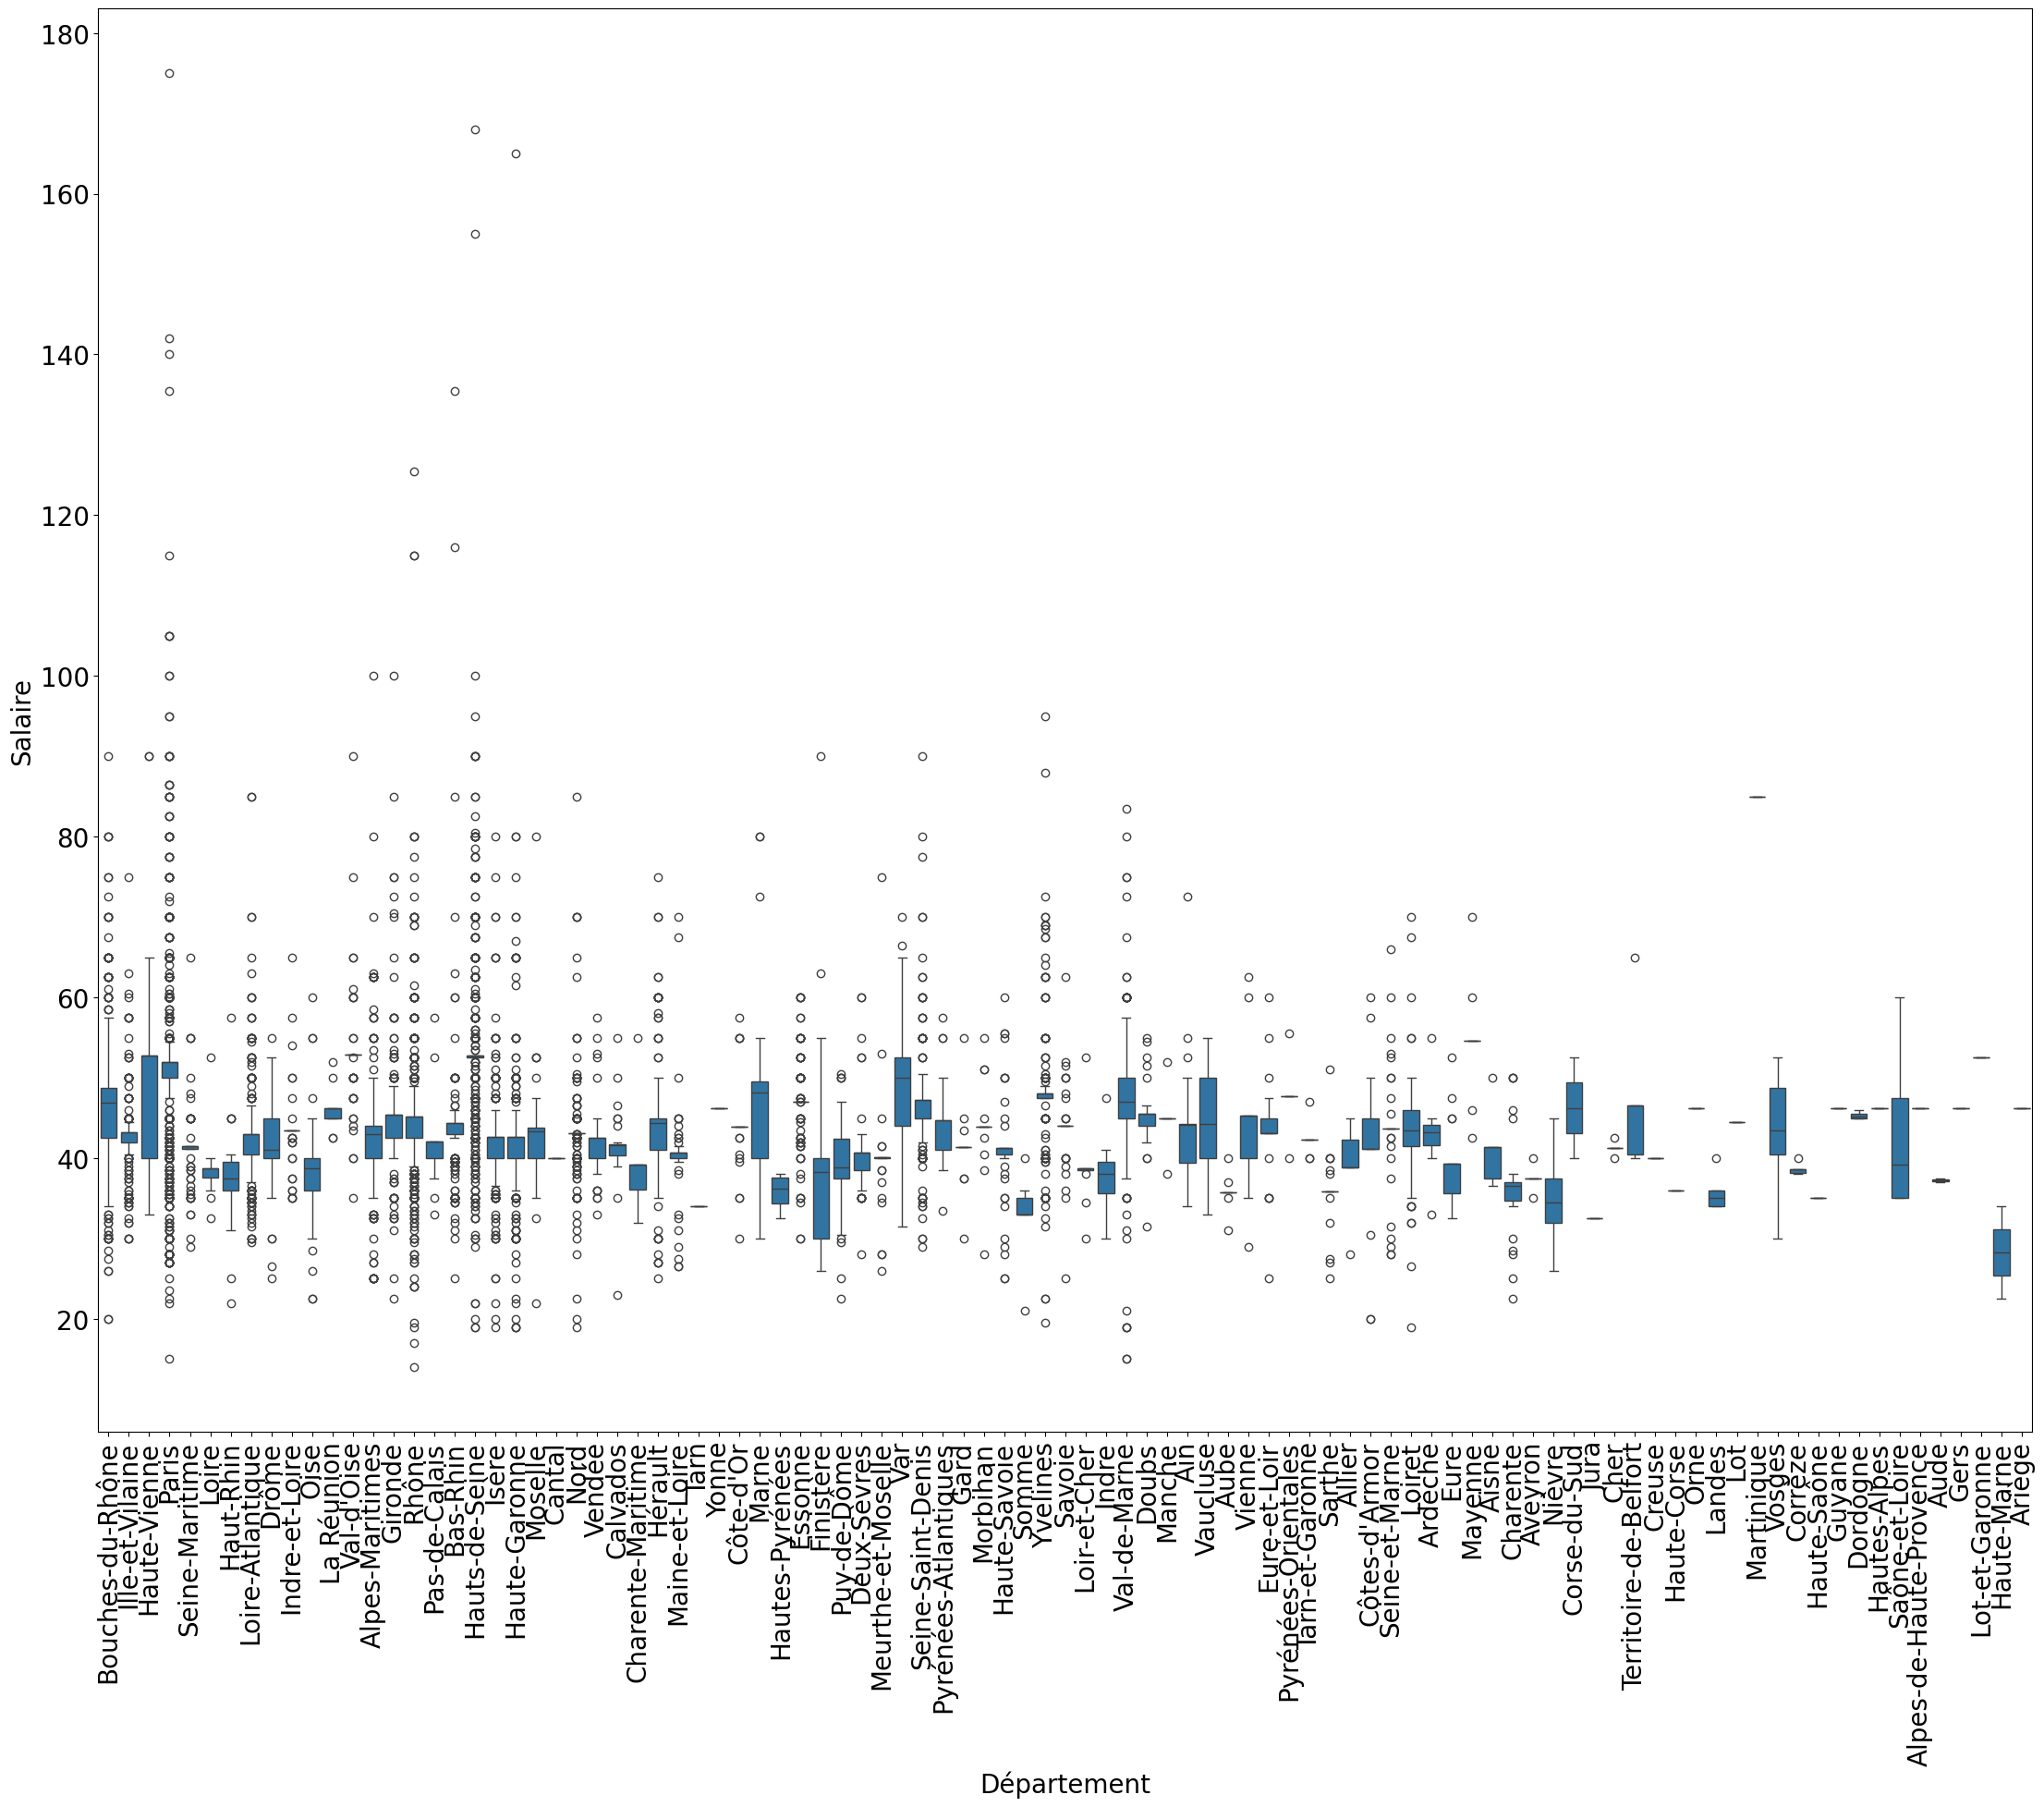

In [24]:
plt.figure(figsize=(27, 20)) 
sns.boxplot(data=df_merged , y='salaire', x="departement")
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Département' , fontsize=20)
plt.ylabel('Salaire' , fontsize=20)
plt.show()

In [25]:
var_per_dep = df_merged.groupby('departement').var()
var_per_dep

,salaire,experience,3ᵉ trim. 2023 (p),2ᵉ trim. 2023,3ᵉ trim. 2022,Superficie [en km²],Population,taux de pauvrete total,Loyer moyen par mètre carré de surface habitable (en €)
departement,,,,,,,,,
Ain,65.916925,4.998188,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aisne,28.291667,0.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Allier,35.433333,3.366667,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alpes-Maritimes,81.090463,2.658441,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alpes-de-Haute-Provence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
Vendée,27.018939,5.169231,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vienne,113.975000,2.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vosges,59.583333,5.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Test de Bartlett pour démontrer l'égalité de la variance des salaires

In [39]:
bartlett_test = bartlett(df_merged[df_merged['departement'] == 'Paris']['salaire'], df_merged[df_merged['departement'] == 'Bouches-du-Rhône']['salaire'], df_merged[df_merged['departement'] == 'Loire-Atlantique']['salaire'])
print("p-value:", bartlett_test.pvalue)

p-value: 1.5275551746968525e-57


In [43]:
salaires_par_departement = [df_merged[df_merged['departement'] == departement]['salaire'] for departement in df_merged['departement'].unique()]

salaires_par_departement = [salaire for salaire in salaires_par_departement if not salaire.empty]

for salaire in salaires_par_departement:
    if not salaire.dtype == 'float64' and not salaire.dtype == 'int64':
        raise ValueError("Les données de salaire ne sont pas numériques.")

bartlett_test = bartlett(*salaires_par_departement)

print("p-value:", bartlett_test.pvalue)

p-value: nan


## Salaire/Métier

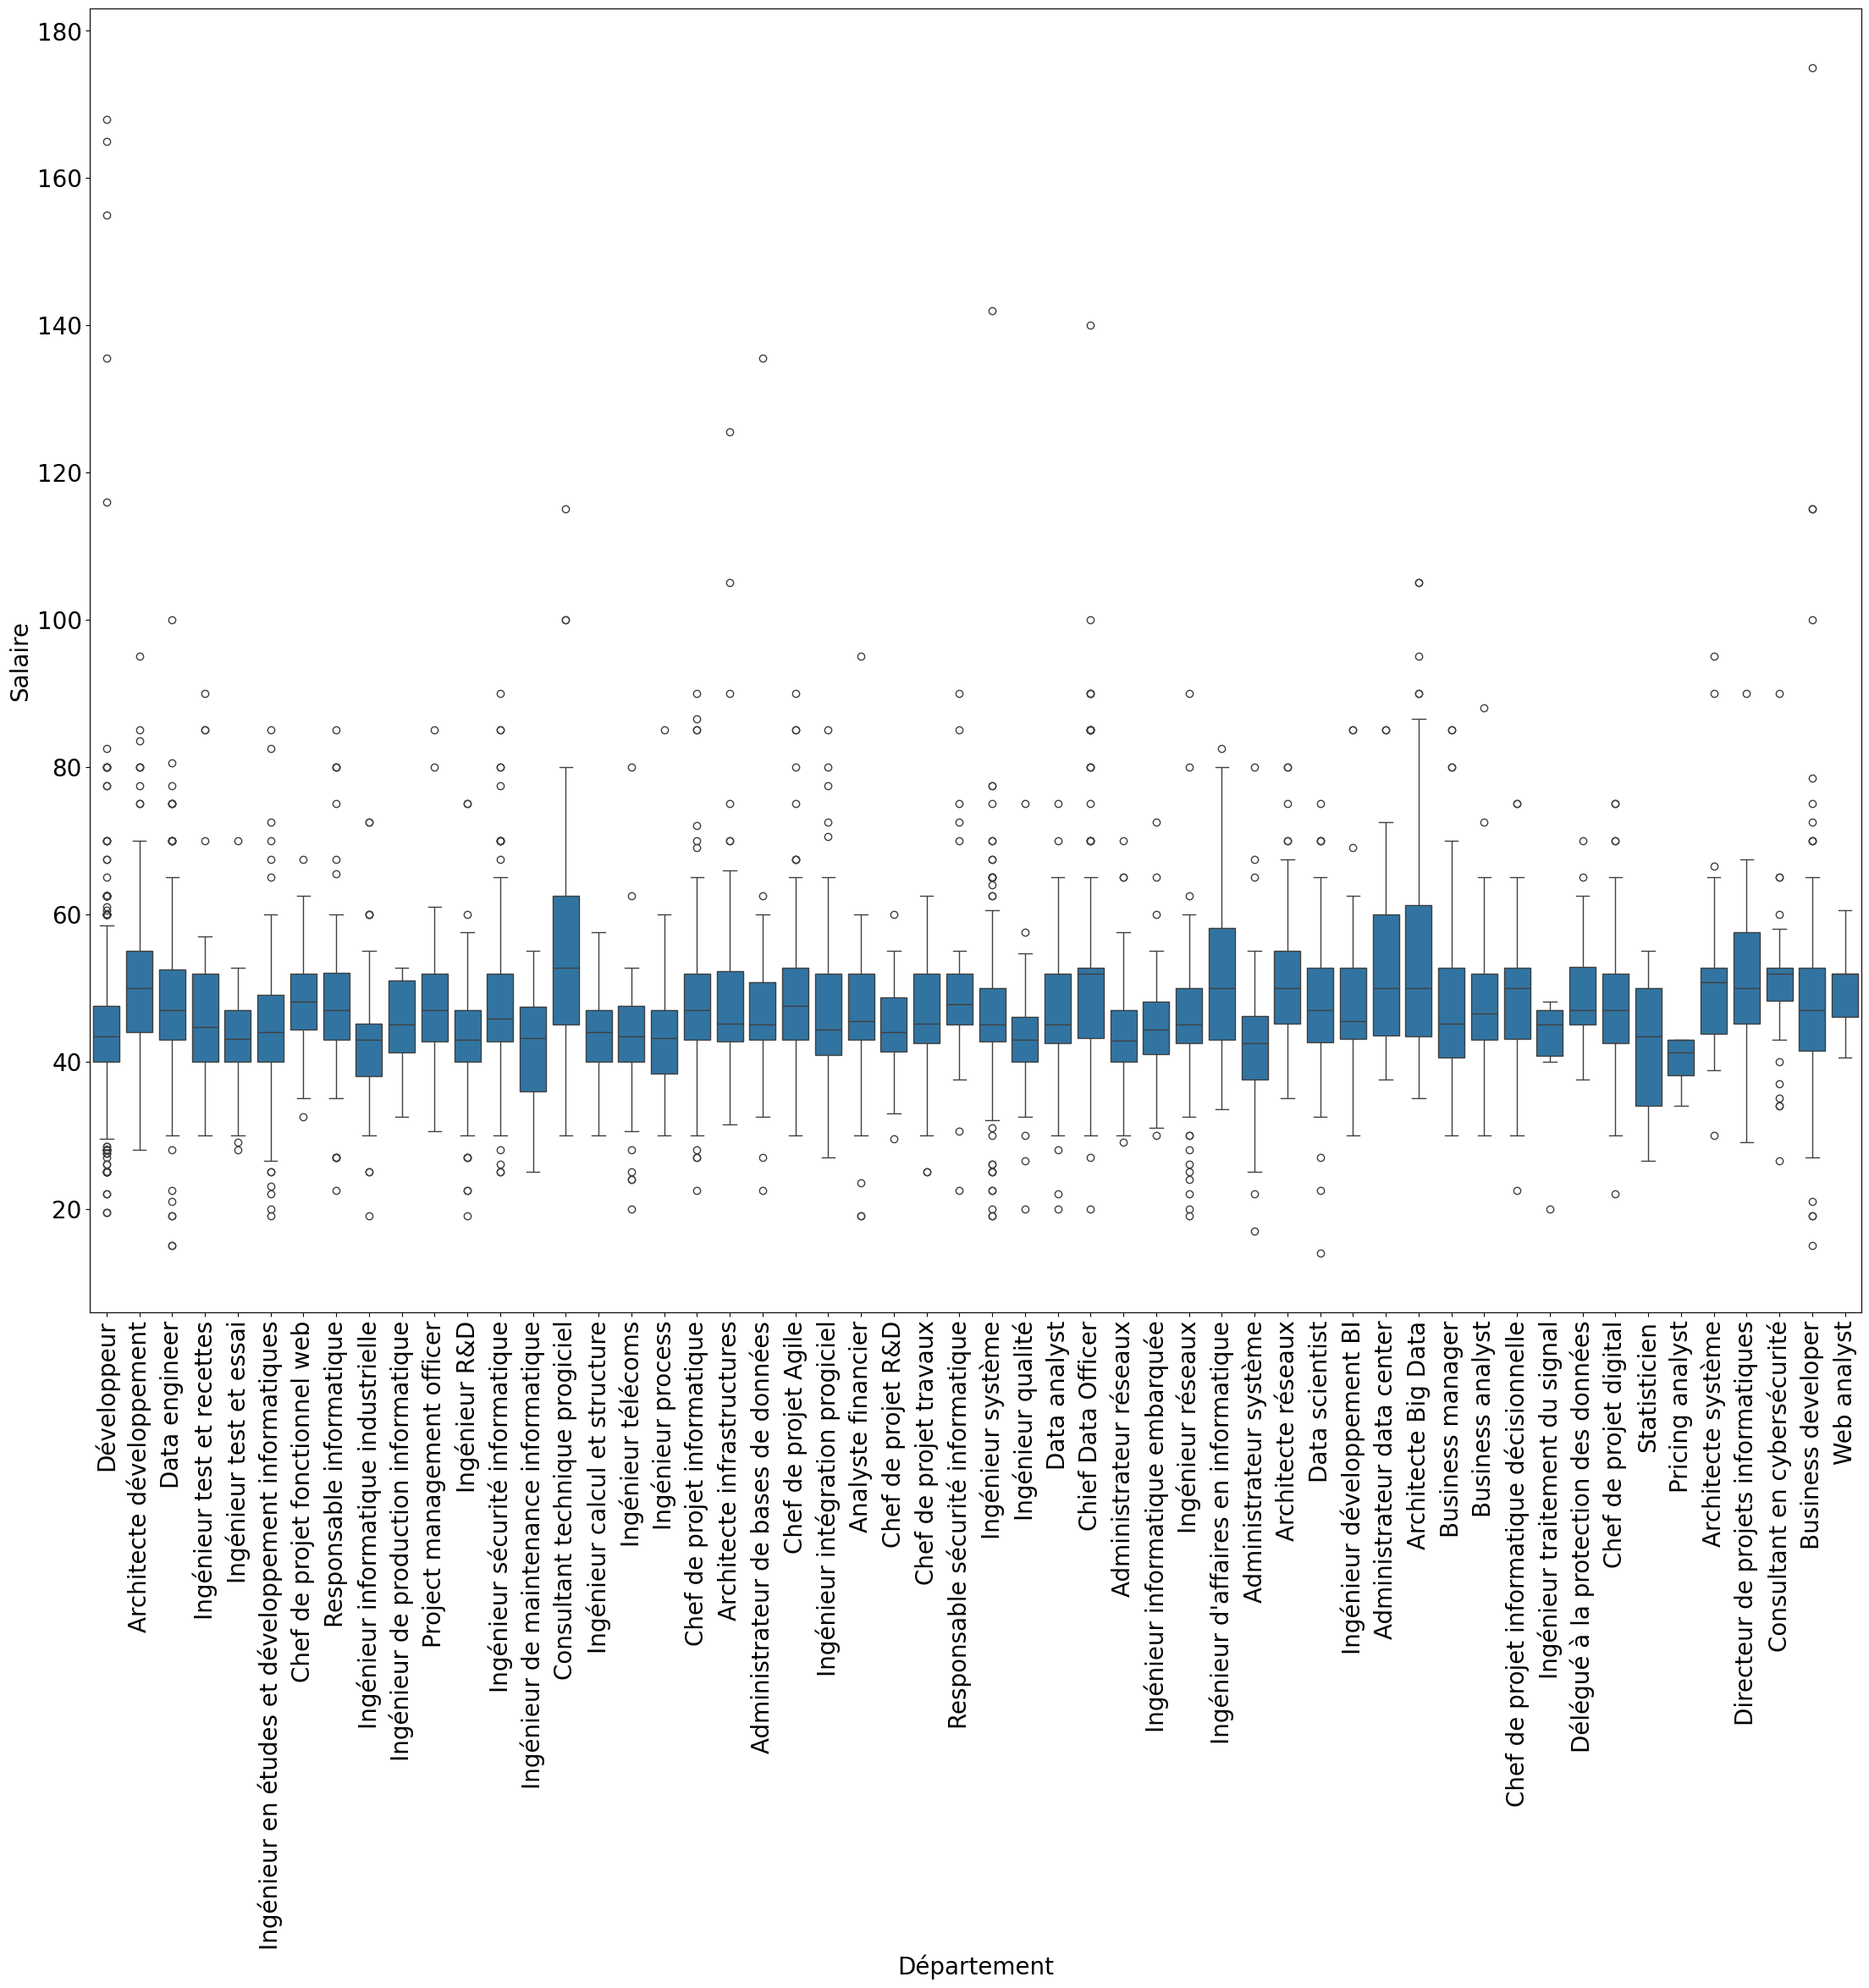

In [44]:
plt.figure(figsize=(27, 20)) 
sns.boxplot(data=df_merged , y='salaire', x="metier")
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Département' , fontsize=20)
plt.ylabel('Salaire' , fontsize=20)
plt.show()

### Test de Bartlett pour démontrer l'égalité de la variance des salaires

In [46]:
salaires_par_metier = [df_merged[df_merged['metier'] == metier]['salaire'] for metier in df_merged['metier'].unique()]

salaires_par_metier = [salaire for salaire in salaires_par_metier if not salaire.empty]

for salaire in salaires_par_metier:
    if not salaire.dtype == 'float64' and not salaire.dtype == 'int64':
        raise ValueError("Les données de salaire ne sont pas numériques.")

bartlett_test = bartlett(*salaires_par_metier)

print("p-value:", bartlett_test.pvalue)

p-value: 2.528781317653942e-144


On remarque que la p-value est inférieure à 0.05, ce qui veut dire que les variables n'ont pas la même variance.
On peut conclure qu'on ne peut pas appliquer le test d'ANOVA

## Test de shapiro

In [47]:
shapiro_test = shapiro(df_merged['salaire'])

print("Statistique du test de Shapiro-Wilk :", shapiro_test.statistic)
print("P-value du test de Shapiro-Wilk :", shapiro_test.pvalue)

Statistique du test de Shapiro-Wilk : 0.8477063775062561
P-value du test de Shapiro-Wilk : 0.0


/home/anyes/.local/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Comme dans notre cas où le nombre d'observations est supérieur à 5000, la p-value peut ne pas être très précise. La grande taille de l'échantillon peut rendre la p-value extrêmement petite, même si les écarts par rapport à la normalité sont minimes.

Dans de telles situations, il est souvent plus informatif de se concentrer sur la statistique de test plutôt que sur la p-value. Une statistique de test plus proche de 1 suggère une meilleure adéquation à la distribution normale.

Ainsi, bien que la p-value soit très petite, la statistique de test de 0.8477 suggère que nos données ne sont pas très éloignées d'une distribution normale.